In [1]:
from soynlp.tokenizer import RegexTokenizer
import pandas as pd
import warnings
warnings.simplefilter('ignore')

tokenizer = RegexTokenizer()
tokenizer

## 데이터 불러오기

In [2]:
df = pd.read_csv('0126 data/train.csv',index_col='index', encoding='utf-8')
df

,category,data
index,,
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...
...,...,...
39995,2,시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에 두 ...
39996,0,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...
39997,2,무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...


## category 컬럼 drop

In [3]:
df.drop(['category'], axis=1,inplace=True)

In [4]:
df

,data
index,
0,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...
...,...
39995,시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에 두 ...
39996,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...
39997,무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...


## 정제
- https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221347960543

In [5]:
import re

In [6]:
df.data

index
0        신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1        학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2        빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...
3        티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠...
4        무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...
                               ...                        
39995    시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에  두 ...
39996    소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...
39997    무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...
39998    교복에  고정식 이름표를 달게 하는 것을 금지해 주세요.. 교복에 이름표를 박아놓아...
39999    합의성관계 가능 나이연령을 올리십시오. 제가 형법공부를하다가 문제를풀고있는데\n금지...
Name: data, Length: 40000, dtype: object

In [7]:
def clean_text(texts):
    aa = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        aa.append(review)
    return aa

In [8]:
df['clean1']=clean_text(df.data)

In [9]:
df['clean1'][0]

'신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지 마시고\\n보편적으로 모든국민이 수긍할 수 있는 복지정책 펴 주시길 바랍니다.\\n저도 신혼부부이지만 당첨되는 사람 로또되는 이런주택정책 반대합니다.\\n국민세금을 일부 사람들에게 퍼주기식이 되면 안되죠..\\n그 세금으로 우리아이 안전하게 맡길 수 있는 보육시설을 전국에 설치해 주세요..\\n대기업들은 솔선수범해서 모든 사업장에 의무설치 할 수 있도록 하시구요..\\n집 보다 애 맡길데가 없어 경력단절 되는게 더 괴롭습니다.!\\n집은 개인의 능력을 키워 사는게 맞습니다.\\n그 능력을 키울수 있도록 육아 전담에 힘을 기울이는게 맞습니다.\\n우리아이 부모가 키우는거 맞지만 이제는 국가가\\n책임지는 시대로 가는게 맞다고 봅니다.\\n그렇잖아도 부동산 가격 자꾸 올라가는게 정부정책이 잘못 되었다고 봅니다.\\n부동산은 그냥 내버려 두세요! 좀!\\n건들수록 역효과네요..'

In [10]:
ab=re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', '',df['clean1'][0])
ab

'신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마시고\\n보편적으로 모든국민이 수긍할 수 있는 복지정책 펴 주시길 바랍니다\\n저도 신혼부부이지만 당첨되는 사람 로또되는 이런주택정책 반대합니다\\n국민세금을 일부 사람들에게 퍼주기식이 되면 안되죠\\n그 세금으로 우리아이 안전하게 맡길 수 있는 보육시설을 전국에 설치해 주세요\\n대기업들은 솔선수범해서 모든 사업장에 의무설치 할 수 있도록 하시구요\\n집 보다 애 맡길데가 없어 경력단절 되는게 더 괴롭습니다\\n집은 개인의 능력을 키워 사는게 맞습니다\\n그 능력을 키울수 있도록 육아 전담에 힘을 기울이는게 맞습니다\\n우리아이 부모가 키우는거 맞지만 이제는 국가가\\n책임지는 시대로 가는게 맞다고 봅니다\\n그렇잖아도 부동산 가격 자꾸 올라가는게 정부정책이 잘못 되었다고 봅니다\\n부동산은 그냥 내버려 두세요 좀\\n건들수록 역효과네요'

In [11]:
abc=ab.replace('\\n','')
abc

'신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마시고보편적으로 모든국민이 수긍할 수 있는 복지정책 펴 주시길 바랍니다저도 신혼부부이지만 당첨되는 사람 로또되는 이런주택정책 반대합니다국민세금을 일부 사람들에게 퍼주기식이 되면 안되죠그 세금으로 우리아이 안전하게 맡길 수 있는 보육시설을 전국에 설치해 주세요대기업들은 솔선수범해서 모든 사업장에 의무설치 할 수 있도록 하시구요집 보다 애 맡길데가 없어 경력단절 되는게 더 괴롭습니다집은 개인의 능력을 키워 사는게 맞습니다그 능력을 키울수 있도록 육아 전담에 힘을 기울이는게 맞습니다우리아이 부모가 키우는거 맞지만 이제는 국가가책임지는 시대로 가는게 맞다고 봅니다그렇잖아도 부동산 가격 자꾸 올라가는게 정부정책이 잘못 되었다고 봅니다부동산은 그냥 내버려 두세요 좀건들수록 역효과네요'

In [12]:
df['clean2']=0
for i in range (0,len(df)):
    df['clean2'][i]=str(df['clean1'][i]).replace('\\n','')
    df['clean2'][i]=re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', '',df['clean2'][i])

In [13]:
df

,data,clean1,clean2
index,,,
0,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마...
1,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓...
2,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...","빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...",빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에...
3,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠...","티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...",티비 세세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일이 생...
4,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타이...
...,...,...,...
39995,시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에 두 ...,시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에 두 자...,시간유연근무제 저는 국립대에서 일하고 있는 비정규직 근로자입니다동시에 두 자녀의 엄...
39996,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다 소년법...
39997,무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...,무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...,무서운데 지켜야 할게 있어요 도와주세요 안녕하세요 한부모엄마 입니다양육비를 받고 ...


## 결측값 drop

In [14]:
df.isnull().sum()

data      8
clean1    0
clean2    0
dtype: int64

In [15]:
df.dropna(how = 'any', inplace=True)
df

,data,clean1,clean2
index,,,
0,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마...
1,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓...
2,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...","빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...",빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에...
3,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠...","티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...",티비 세세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일이 생...
4,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타이...
...,...,...,...
39995,시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에 두 ...,시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에 두 자...,시간유연근무제 저는 국립대에서 일하고 있는 비정규직 근로자입니다동시에 두 자녀의 엄...
39996,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다 소년법...
39997,무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...,무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...,무서운데 지켜야 할게 있어요 도와주세요 안녕하세요 한부모엄마 입니다양육비를 받고 ...


## 데이터 선택

In [16]:
data=df[['clean2']]

In [17]:
data

,clean2
index,
0,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마...
1,학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓...
2,빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에...
3,티비 세세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일이 생...
4,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타이...
...,...
39995,시간유연근무제 저는 국립대에서 일하고 있는 비정규직 근로자입니다동시에 두 자녀의 엄...
39996,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다 소년법...
39997,무서운데 지켜야 할게 있어요 도와주세요 안녕하세요 한부모엄마 입니다양육비를 받고 ...


## 토큰화, word2vec

In [18]:
sentences =data.stack()

In [19]:
sentences

index        
0      clean2    신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마...
1      clean2    학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓...
2      clean2    빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에...
3      clean2    티비 세세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일이 생...
4      clean2    무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타이...
                                       ...                        
39995  clean2    시간유연근무제 저는 국립대에서 일하고 있는 비정규직 근로자입니다동시에 두 자녀의 엄...
39996  clean2    소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다 소년법...
39997  clean2    무서운데 지켜야 할게 있어요 도와주세요 안녕하세요  한부모엄마 입니다양육비를 받고 ...
39998  clean2    교복에 고정식 이름표를 달게 하는 것을 금지해 주세요 교복에 이름표를 박아놓아 탈부...
39999  clean2    합의성관계 가능 나이연령을 올리십시오 제가 형법공부를하다가 문제를풀고있는데금지착오부...
Length: 39992, dtype: object

In [20]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 20.4 s


index        
0      clean2    [신혼부부위한, 주택정책, 보다, 보육시설, 늘려주세요, 국민세금으로, 일부를, 위...
1      clean2    [학교이름에, 남자도, 붙여주세요, 울산여자중학교에, 재학중인, 학생입니다, 최근,...
2      clean2    [빙상연맹, 대한축구협회등, 각종, 체육협회의, 비리를, 철저하게, 밝혀주세요, 최...
dtype: object

In [21]:
from gensim.models import word2vec
model = word2vec.Word2Vec(tokens, min_count=1)
model

In [22]:
model_name = 'wtobtest1'
model.save(model_name)

In [23]:
model.wv.key_to_index

{'수': 0,
 '있는': 1,
 '그': 2,
 '이': 3,
 '대한': 4,
 '하는': 5,
 '있습니다': 6,
 '더': 7,
 '합니다': 8,
 '할': 9,
 '한': 10,
 '하고': 11,
 '및': 12,
 '저는': 13,
 '많은': 14,
 '년': 15,
 '이런': 16,
 '위해': 17,
 '없는': 18,
 '너무': 19,
 '왜': 20,
 '것이': 21,
 '그리고': 22,
 '것은': 23,
 '모든': 24,
 '같은': 25,
 '정말': 26,
 '많이': 27,
 '생각합니다': 28,
 '다른': 29,
 '것': 30,
 '등': 31,
 '것을': 32,
 '%': 33,
 '위한': 34,
 '또한': 35,
 '다': 36,
 '아니라': 37,
 '대한민국': 38,
 '하지만': 39,
 '제가': 40,
 '아닌': 41,
 '때문에': 42,
 '현재': 43,
 '잘': 44,
 '우리': 45,
 '않고': 46,
 '대해': 47,
 '‘': 48,
 '또': 49,
 '하지': 50,
 '’': 51,
 '이렇게': 52,
 '“': 53,
 '있도록': 54,
 '지금': 55,
 '다시': 56,
 '”': 57,
 '제': 58,
 '월': 59,
 '바랍니다': 60,
 '일': 61,
 '큰': 62,
 '될': 63,
 '모두': 64,
 '학교': 65,
 '한다고': 66,
 '주세요': 67,
 '어떻게': 68,
 '않는': 69,
 '제대로': 70,
 '것입니다': 71,
 '문제가': 72,
 '없이': 73,
 '중': 74,
 '그런': 75,
 '전': 76,
 '청원합니다': 77,
 '아이를': 78,
 '경우': 79,
 '안': 80,
 '있고': 81,
 '보고': 82,
 '해주세요': 83,
 '없습니다': 84,
 '이러한': 85,
 '꼭': 86,
 '통해': 87,
 '있다고': 88,
 '부탁드립니다': 89,
 '되는': 90,


In [24]:
model.wv

In [25]:
model.wv.most_similar('세금')

[('그돈', 0.9548370838165283),
 ('세금은', 0.9471617937088013),
 ('피같은', 0.9396039247512817),
 ('줘도', 0.9383798837661743),
 ('돈좀', 0.9363859295845032),
 ('올라서', 0.9361243844032288),
 ('낭비', 0.9355064034461975),
 ('떼는', 0.9336779117584229),
 ('어짜피', 0.9332849979400635),
 ('쓰레기를', 0.9322294592857361)]

In [26]:
model.wv.most_similar('연맹')

[('협회', 0.9656449556350708),
 ('전명규', 0.9639407396316528),
 ('코치', 0.9626235365867615),
 ('빙상', 0.9606499075889587),
 ('부회장의', 0.9593163728713989),
 ('문체부', 0.959200382232666),
 ('체육계', 0.9587938189506531),
 ('해체와', 0.957529604434967),
 ('이기흥', 0.9560700058937073),
 ('파면하라', 0.9556366801261902)]

In [27]:
model.wv.most_similar('소년법')

[('청소년법', 0.983874499797821),
 ('청소년보호법', 0.9834586977958679),
 ('청소년보호법을', 0.9794306755065918),
 ('보호법을', 0.9785053730010986),
 ('청소년법을', 0.9765806794166565),
 ('소년법을', 0.9695449471473694),
 ('소년법은', 0.9630588889122009),
 ('청소년법폐지', 0.9591338038444519),
 ('소년법폐지', 0.9585622549057007),
 ('보호법', 0.9585146903991699)]

In [28]:
model.wv.most_similar('북한')

[('올림픽의', 0.9701509475708008),
 ('대표팀의', 0.9657110571861267),
 ('단일', 0.9621800780296326),
 ('감독의', 0.9617742300033569),
 ('평화', 0.9606908559799194),
 ('선수단', 0.9602527618408203),
 ('단일팀으로', 0.9602454304695129),
 ('감독님의', 0.9589861631393433),
 ('인공기', 0.9589176177978516),
 ('독일전', 0.9588382840156555)]

In [29]:
model.wv.most_similar('김정은')

[('한때', 0.9831950664520264),
 ('민주당', 0.9826162457466125),
 ('광화문', 0.9820054769515991),
 ('좌파', 0.9814229607582092),
 ('박상기', 0.9813023805618286),
 ('한국당', 0.9806577563285828),
 ('야당', 0.9799054265022278),
 ('태극기', 0.9791463017463684),
 ('고위급', 0.9780259132385254),
 ('국무총리', 0.9777098298072815)]

In [30]:
model.wv.similarity('김정은','북한')

0.95342875

## 임베딩

In [31]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

mpl.rcParams['font.family']='Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [32]:
model_name = 'wtobtest1'
# model = g.Doc2Vec.load(model_name)
model =g.Word2Vec.load(model_name)

In [33]:
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform( X[:150,:] )

In [34]:
X_tsne.shape

(150, 2)

In [35]:
df = pd.DataFrame(X_tsne, index = vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [36]:
import warnings
warnings.simplefilter('ignore')

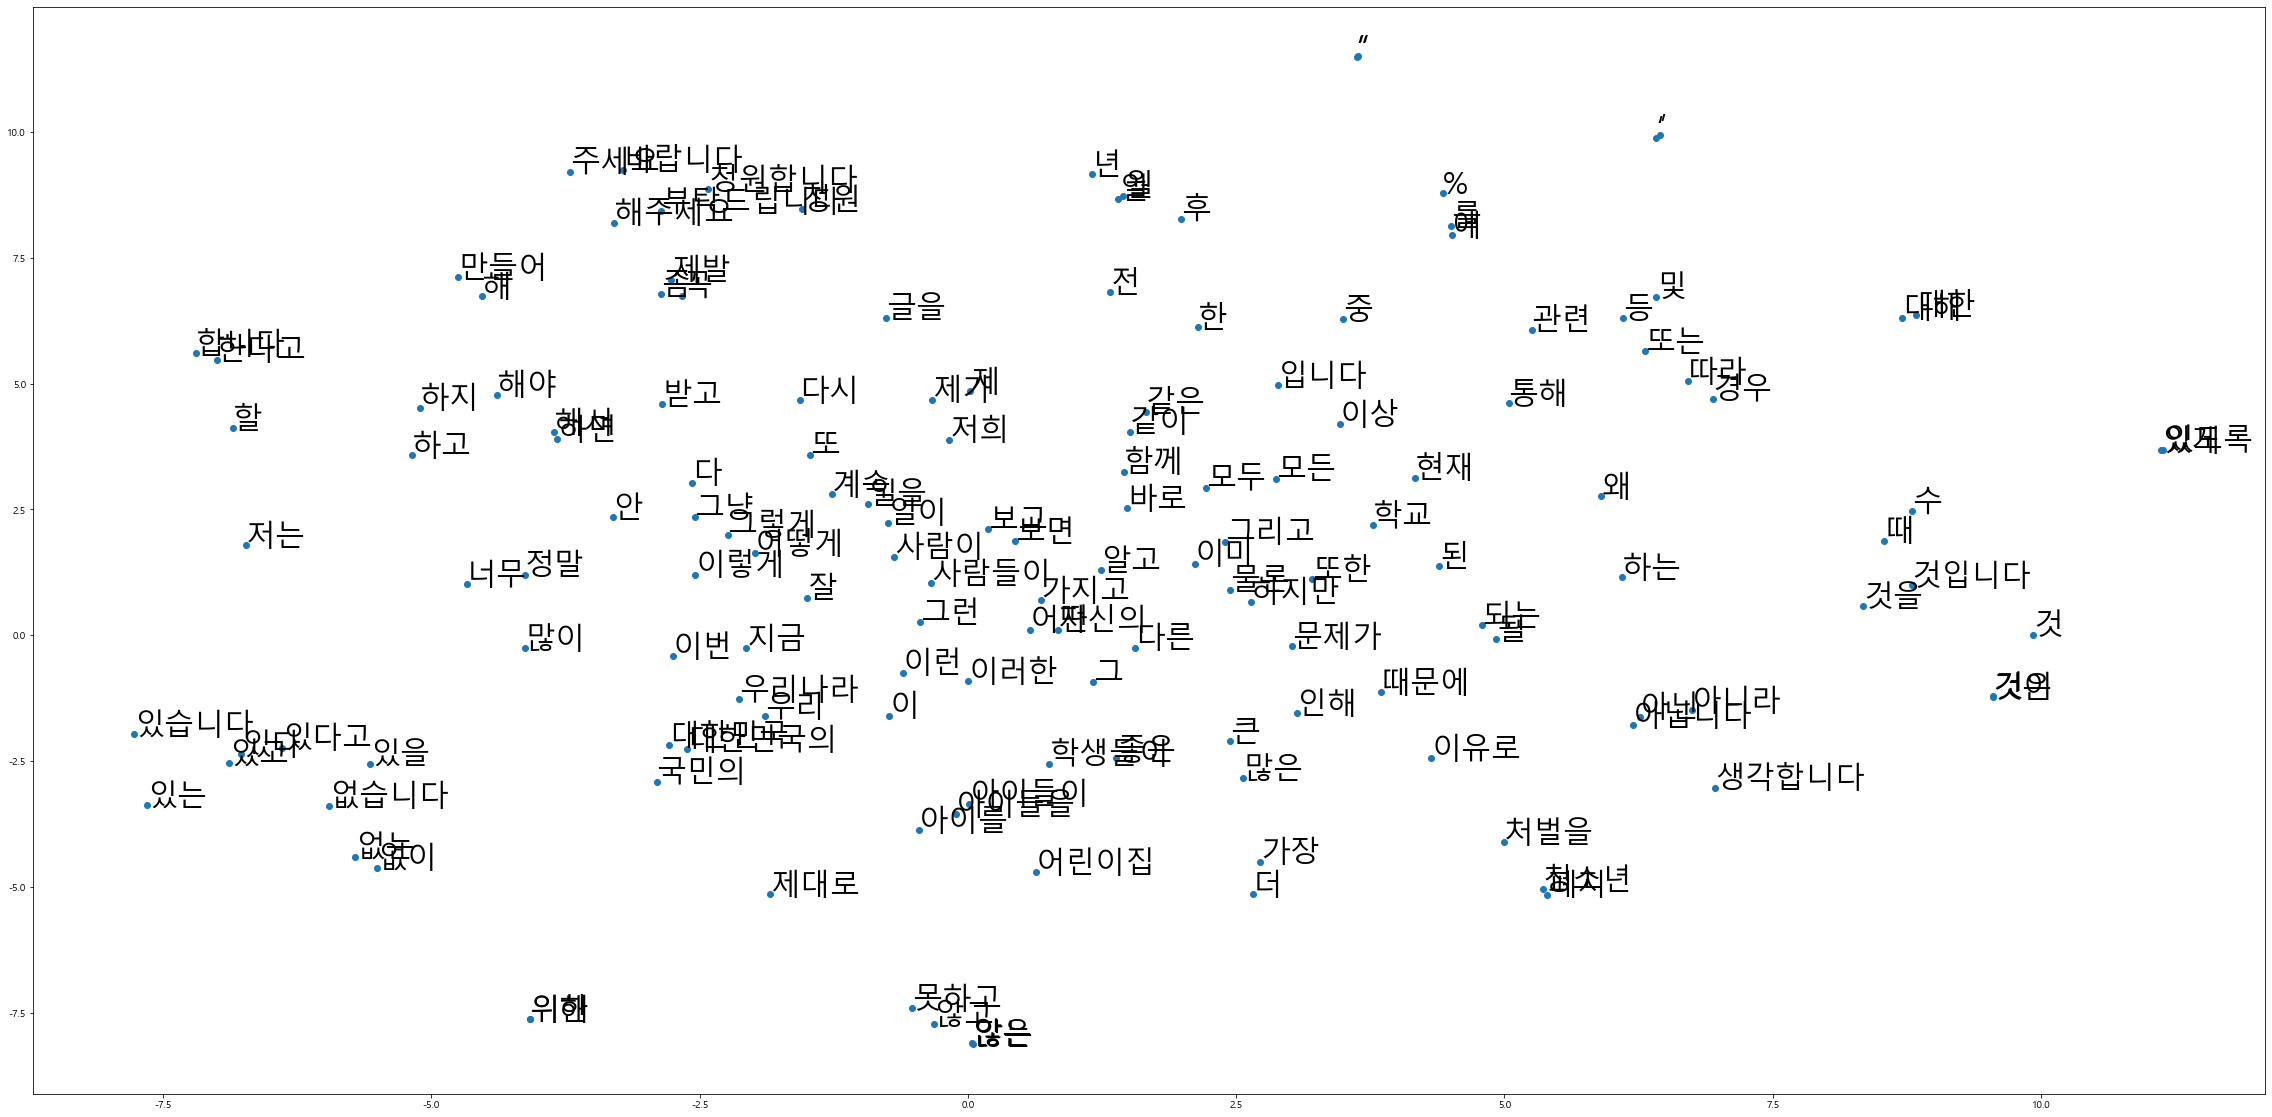

In [37]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [38]:
from konlpy.tag import Okt

In [39]:
okt=Okt()

In [40]:
textlist=sentences.values[:1000].tolist()
textlist

['신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마시고보편적으로 모든국민이 수긍할 수 있는 복지정책 펴 주시길 바랍니다저도 신혼부부이지만 당첨되는 사람 로또되는 이런주택정책 반대합니다국민세금을 일부 사람들에게 퍼주기식이 되면 안되죠그 세금으로 우리아이 안전하게 맡길 수 있는 보육시설을 전국에 설치해 주세요대기업들은 솔선수범해서 모든 사업장에 의무설치 할 수 있도록 하시구요집 보다 애 맡길데가 없어 경력단절 되는게 더 괴롭습니다집은 개인의 능력을 키워 사는게 맞습니다그 능력을 키울수 있도록 육아 전담에 힘을 기울이는게 맞습니다우리아이 부모가 키우는거 맞지만 이제는 국가가책임지는 시대로 가는게 맞다고 봅니다그렇잖아도 부동산 가격 자꾸 올라가는게 정부정책이 잘못 되었다고 봅니다부동산은 그냥 내버려 두세요 좀건들수록 역효과네요',
 '학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓기를 하다 생각했습니다 우리 울산엔 울산중학교는 두개입니다 하나는 남중하나는 여중인데 어째서 우리학교만 여자를 붙여야하는가 하고요 남자가 우위였던 때 지어졌던 학교라 그런진 모르겠지만 울산중학교남중에도 남자를 붙여 울산남자중학교가 되게 해주세요평소에 학교이름을 줄여 부를때에도 우리학교는 울여중남중은 그냥 울중 이라 부릅니다 몇년동안 그리 불러온 너무나 익숙해진 이 현실을 이젠 바꿀때가 되지않았나 싶네요지금은 조선시대가 아니니까요국내에 이런 학교는 널렸습니다 울산뿐만이 아니라 국내 다른 중고등학교에 있는 똑같은 문제들을 해결해주셨으면 합니다',
 '빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에서 김보름 박지우 선수와 관련해서 큰 논란거리가 되고 있는데요 선수 개개인의 문제를 떠나서 이번일에 대해 대한빙상연맹의 불합리한 행정에 불신을 갖고있는 사람들이 많습니다 이제 동계올림픽도 폐막일이 다가오고 월이 되면 러시아에서 년마다 열리는 월드컵 축구대회가 열리는데요 월드컵이 시작도 하기전부터 감

In [41]:
type(textlist)

list

In [42]:
textstr=str(textlist)

In [43]:
print(okt.nouns(textstr))

['신혼부부', '위', '주택', '정책', '보육', '시설', '국민', '세금', '일부', '위', '정책', '보편', '국민', '수긍', '수', '복지', '정책', '도', '신혼부부', '당첨', '사람', '로또', '주택', '정책', '반대', '국민', '세금', '일부', '사람', '퍼', '주기', '식이', '세금', '우리', '아이', '수', '보육', '시설', '전국', '설치', '대기업', '솔선수범', '모든', '사업', '의무', '설치', '수', '집', '애', '경력', '단절', '더', '개인', '능력', '능력', '육아', '전담', '힘', '우리', '아이', '부모', '이제', '국가', '시대', '부동산', '가격', '자꾸', '정부', '정책', '잘못', '부동산', '그냥', '좀', '수록', '역효과', '학교', '이름', '남자', '울산', '여자', '중학교', '재학', '학생', '최근', '양성평등', '글짓기', '생각', '우리', '울산', '울산', '중학교', '개입', '니', '하나', '남중', '하나', '여중', '어째서', '우리', '학교', '여자', '남자', '우위', '때', '학교', '울산', '중학교', '남중', '남자', '산남', '중학교', '평소', '학교', '이름', '때', '우리', '학교', '여중', '남중', '그냥', '중', '년', '동안', '온', '이', '현실', '젠', '때', '지금', '조선시대', '요', '국내', '학교', '널렸습니', '울산', '국내', '다른', '중', '고등학교', '문제', '해결', '빙상', '연맹', '축구', '협회', '등', '각종', '체육', '협회', '비리', '최근', '동계올림픽', '김보름', '박지우', '선수', '관련', '논란', '거리', '선수', '개개인', '문제', '이번', '일', '대해', '빙상', '연맹'

In [62]:
textstr2 = [i for i in okt.nouns(textstr) if len(i)>=2]

In [63]:
textstrstr= str(textstr2)

In [64]:
type(textstrstr)

str

In [46]:
from nltk import Text
import matplotlib.pyplot as plt
import matplotlib

In [65]:
txt=Text(okt.nouns(textstrstr))

In [66]:
txt.vocab()

FreqDist({'생각': 683, '아이': 621, '학생': 542, '사람': 535, '국민': 490, '학교': 477, '여성': 386, '교육': 368, '선수': 357, '교사': 351, ...})

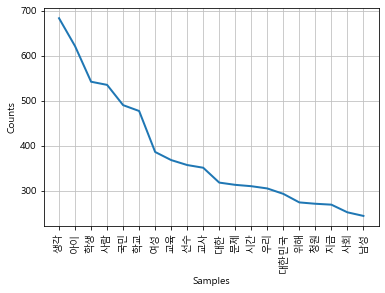

In [67]:
txt.plot(20)
plt.show()

In [68]:
from wordcloud import WordCloud

In [69]:
font_path = 'c:\Windows\Fonts\malgun.ttf'
wc=WordCloud(width=1000, height=600, background_color='white', font_path =font_path)

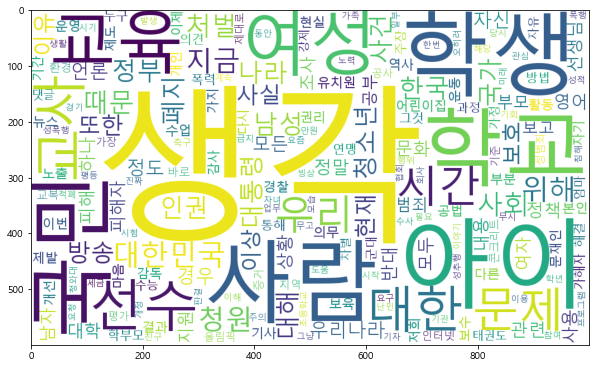

In [70]:
gen=wc.generate_from_frequencies(txt.vocab())
plt.figure(figsize=(10,8))
plt.imshow(gen)
plt.show()